# Capital Bikeshare Prediction: Data Investigation

**Author**: Matthew Cassi
**Date**: October 4, 2017

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
import seaborn as sb

bikeshare_series = pd.read_csv('bikeshare_reduced.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'], 
                        index_col='Start date')

bikeshare = pd.read_csv('bikeshare_reduced.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])

bikeshare.drop('Unnamed: 0', 1, inplace=True)
bikeshare_series.drop('Unnamed: 0', 1, inplace=True)

bikeshare_date_count = bikeshare.copy()
bikeshare_date_count = bikeshare.groupby('start_date_short')['mnth'].count()

bikeshare_count = bikeshare_series.copy()
bikeshare_count = bikeshare_count['mnth'].resample('1W').count()

bikeshare_member = bikeshare.copy()
bikeshare_member = bikeshare.groupby('Member Type')['Member Type'].count()

bikeshare_reg = bikeshare[bikeshare['Member Type'] == 'Registered']
bikeshare_cas = bikeshare[bikeshare['Member Type'] == 'Casual']
bikeshare_count_reg = bikeshare_reg.groupby(['start_date_short'])['mnth'].count()
bikeshare_count_cas = bikeshare_cas.groupby(['start_date_short'])['mnth'].count()

bikeshare_time_avg = bikeshare.groupby('start_date_short')['time_diff'].mean()

bikeshare_4d = bikeshare_series.copy()
bikeshare_4d = bikeshare_4d['time_diff'].resample('1W').mean()

weather_type_grouping = bikeshare.copy()
weather_type_grouping = bikeshare.groupby('weathersit')['time_diff'].mean()

bikeshare_weather_type = bikeshare.copy()
bikeshare_weather_type = bikeshare_weather_type[['Member Type','weathersit','time_diff']]
bikeshare_weather_type_piv = bikeshare_weather_type.pivot_table(index='weathersit', 
                                                              columns='Member Type', aggfunc='mean')

bikeshare_season_type = bikeshare.copy()
bikeshare_season_type = bikeshare_season_type[['Member Type','season','time_diff']]
bikeshare_season_type_piv = bikeshare_season_type.pivot_table(index='season', 
                                                              columns='Member Type', aggfunc='mean')

season_grouping = bikeshare.copy()
season_grouping = bikeshare.groupby('season')['time_diff'].mean()

bikeshare_holiday_type = bikeshare.copy()
bikeshare_holiday_type = bikeshare_holiday_type[['Member Type','holiday','time_diff']]
bikeshare_holiday_type_piv = bikeshare_holiday_type.pivot_table(index='holiday', 
                                                              columns='Member Type', aggfunc='mean')

holiday_grouping = bikeshare.copy()
holiday_grouping = bikeshare.groupby('holiday')['time_diff'].mean()

bikeshare_weekday_type = bikeshare.copy()
bikeshare_weekday_type = bikeshare_weekday_type[['Member Type','weekday','time_diff']]
bikeshare_weekday_type_piv = bikeshare_weekday_type.pivot_table(index='weekday', 
                                                              columns='Member Type', aggfunc='mean')

weekday_grouping = bikeshare.copy()
weekday_grouping = bikeshare.groupby('weekday')['time_diff'].mean()

bikeshare_work_type = bikeshare.copy()
bikeshare_work_type = bikeshare_work_type[['Member Type','workingday','time_diff']]
bikeshare_work_type_piv = bikeshare_work_type.pivot_table(index='workingday', 
                                                              columns='Member Type', aggfunc='mean')

workday_grouping = bikeshare.copy()
workday_grouping = bikeshare.groupby('workingday')['time_diff'].mean()

## Questions Asked
After cleaning up the data and joining all of it together the next step was to investigate trends in the number of rides and ride times. 

Questions Asked:
1. Do the number of rides change based on the season? 
    * What about the number of rides based on Member Type?
2. Does the ride time differ based on the different seasons (Winter, Spring, etc.)? 
    * Based on Temperature? 
    * Based on Windspeed? 
    * Based on Humidity? 
    * Based on weather category (sunny, cloudy, rainy, snowy, etc.)?
3. Does the ride time differ based on the different Member Type (Casual rider vs. Registered rider)? 
4. What is the average ride time on holidays vs. non-holidays?
    * Based on weekday?
    * Based on season?
    * Based on month?
    * How are these averages different for member type?
5. What are the most popular starting stations?
6. What are the most popular end stations?
7. What are the most popular start and end station combinations?

Answering these questions will provide further scenarios to investigate and insights as to what might cause ride times to increase between two bikeshare stations. 

## Number of Rides
The number of rides per day for an entire year can show if seasons cause an increase or descrease in ridership. Looking at the graph below on the left, the number of rides decreases when in the fall and winter seasons and increases during the spring and summer seasons. There is a lot of variability, which is difficult to read. The data were resampled based on the using weekly means and plotted. The trends remain the same but are easier to see.

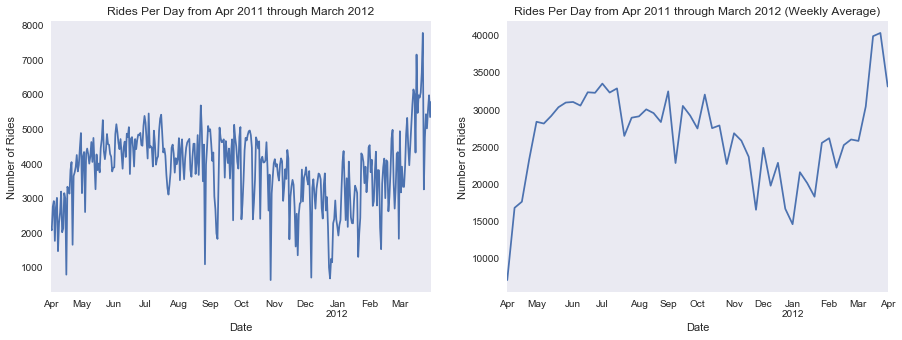

In [124]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
bikeshare_date_count.plot()
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Rides Per Day from Apr 2011 through March 2012')
plt.subplot(1,2,2)
bikeshare_count.plot()
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Rides Per Day from Apr 2011 through March 2012 (Weekly Average)')
plt.show()

There are 1.4 million rides included in the dataset. What is the breakdown of this by member type? Registered users greatly outnumber the amount of rides compared to casual riders, which is to be expected. 

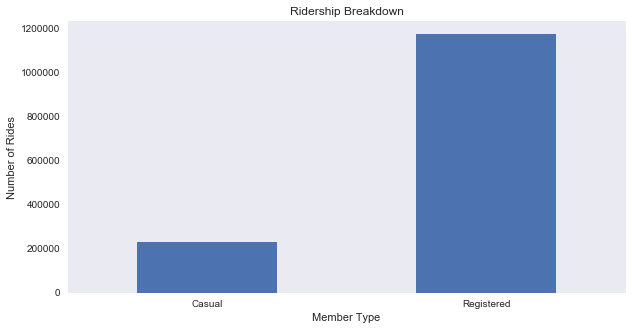

In [125]:
plt.figure(figsize=(10, 5))
bikeshare_member.plot.bar(rot=0)
plt.grid(False)
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')
plt.title('Ridership Breakdown')
plt.show()

The trend should be fairly the same when looking at both member types (registered and casual) and number of rides on a daily basis. The graph below shows that the number of rides by registered and casual riders follow the same trends as the full dataset. Each have show a decrease in the fall and winter with an uptick in the spring and summer.

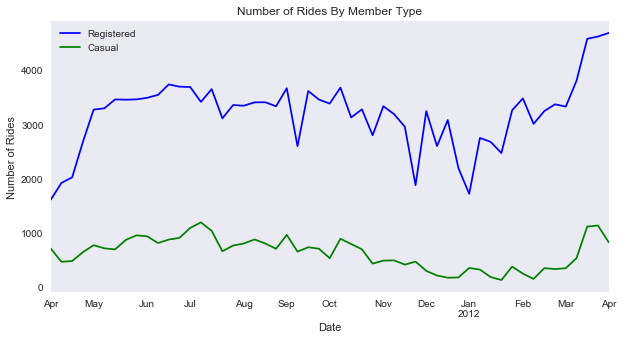

In [126]:
plt.figure(figsize=(10, 5))
bikeshare_count_reg.resample('1W').mean().plot(c='blue', label='Registered')
bikeshare_count_cas.resample('1W').mean().plot(c='green', label='Casual')
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides By Member Type')
plt.legend()
plt.show()

Based on the number of rides and the number of rides, one would expect that ride times would be greater in spring and summer compared to the fall and winter. This could be explained by riders deciding to ride to further locations because of more cooperative weather (warmer temperatures, rain vs. snow, etc). It can also be expected that the casual riders would be on bikes longer than registered riders. 

## Ride Times
The mean and median are both important to look at for the ride duration column of the dataset. The median is 11 minutes and the mean is ~13.9 minutes, which means the most rides are fairly quick.

In [26]:
list1 = list(bikeshare['time_diff'].describe().loc[['mean', '50%','min','max']].values)
list2 = ['Mean', 'Median', 'Minimum', 'Maximum']
for s in range(0,4):
    print(list2[s] + ': ' + str(list1[s]))

Mean: 13.8988544024
Median: 11.0
Minimum: 0.0
Maximum: 79.0


The distribution of the duration variable is right skewed meaning the most of the values occur to the left of the plot. The next question to ask is whether the distribution changes with regards to registered and casual riders.

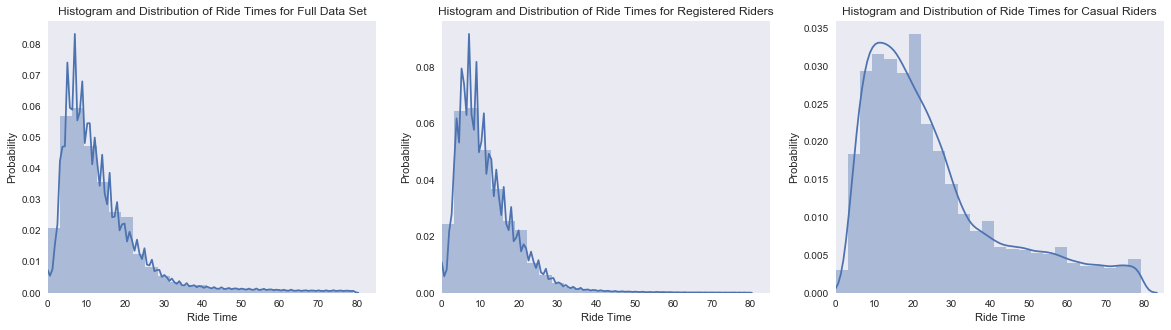

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sb.distplot(bikeshare['time_diff'], bins=25)
plt.grid(False)
plt.xlabel('Ride Time')
plt.ylabel('Probability')
plt.title('Histogram and Distribution of Ride Times for Full Data Set')
plt.xlim([0,85])
plt.subplot(1,3,2)
sb.distplot(bikeshare_reg['time_diff'], bins=25)
plt.grid(False)
plt.xlabel('Ride Time')
plt.ylabel('Probability')
plt.title('Histogram and Distribution of Ride Times for Registered Riders')
plt.xlim([0,85])
plt.subplot(1,3,3)
sb.distplot(bikeshare_cas['time_diff'], bins=25)
plt.grid(False)
plt.xlabel('Ride Time')
plt.ylabel('Probability')
plt.title('Histogram and Distribution of Ride Times for Casual Riders')
plt.xlim([0,85])
plt.show()

The distribution of the registered riders is very similar to the overall distribution. The casusal rider distribution is different from the other two distributions. Although the distribution is still right skewed, there is more variability in the data compared to the registered rider and overall distributions. In addition to the differences in distributions, the mean of each is different for each of the datasets (overall, registered, and casual). 
<br>
<br>
Based on the analysis of the number of rides above, the ride time was expected to be shorter when there were less rides (in the fall/winter) and longer when there were more rides (in the spring/summer). The graph on the left shows the data based on daily averages whereas the graph on the right shows the resampled data based on 1 week increments. The average ride duration does decrease in the fall/winter and does increase in the spring/summer.

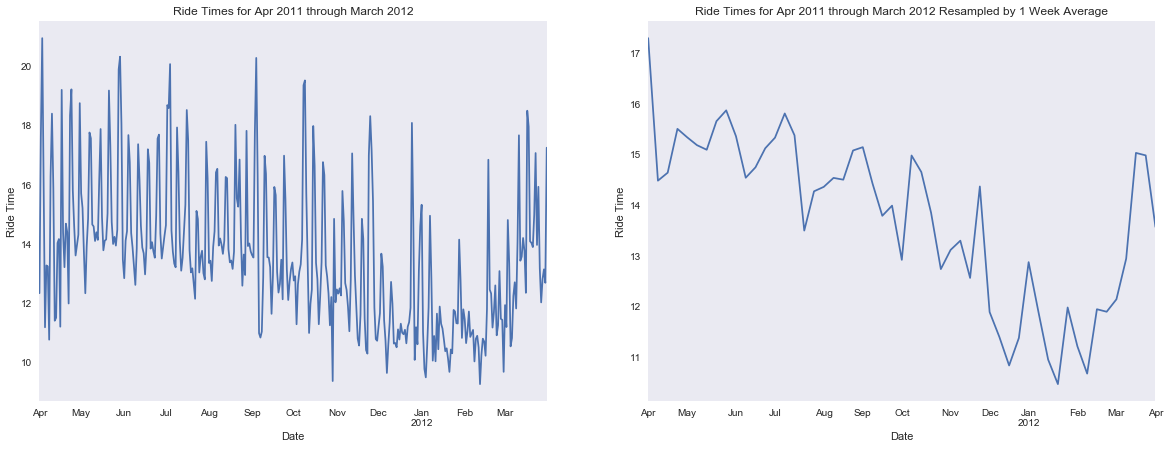

In [11]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
bikeshare_time_avg.plot()
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Ride Time')
plt.title('Ride Times for Apr 2011 through March 2012')
plt.subplot(1,2,2)
bikeshare_4d.plot()
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Ride Time')
plt.title('Ride Times for Apr 2011 through March 2012 Resampled by 1 Week Average')
plt.show()

When looking at the breakdown of ride times for the two member types resampled over 1 week averages, the ride times also increase in the spring/summer and decrease in the fall and winter. However, it is not as drastic as the overall data.

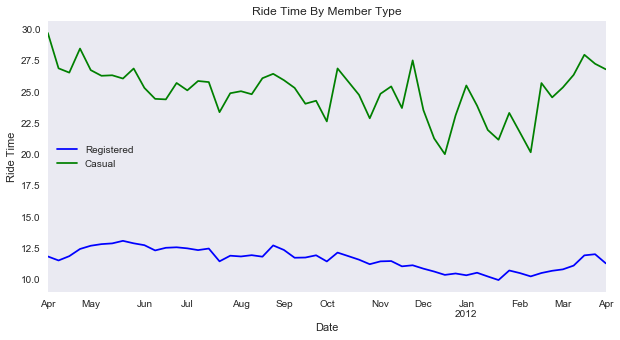

In [94]:
plt.figure(figsize=(10, 5))
bikeshare_reg['time_diff'].resample('1W').mean().plot(c='blue', label='Registered')
bikeshare_cas['time_diff'].resample('1W').mean().plot(c='green', label='Casual')
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Ride Time')
plt.title('Ride Time By Member Type')
plt.legend()
plt.show()

## Ride Times and Weather
After looking at how ride times over the course of the full year, the mnext step is to examine how ride times are affected by weather. The variables included in the dataset are temperature, humidity, windspeed, and weather category (sunny, cloudy, rainy, etc).
<br>
<br>
In the ride time analysis, the graphs showed that there was a change based on the season. The dataset contains a categorical variable for the season, which can be used to visualize the different means of each. The graph on the left shows the mean ride times for the different seasons for the entire dataset. The graph on the right shows the average ride times per season based on the member type. The graphs show that the average ride times in the fall and summer are greater than the ride times in the spring and winter. This is an interesting result based on the graphs in the previous section as it seemed as though the spring/summer values were greater than the fall/winter values.

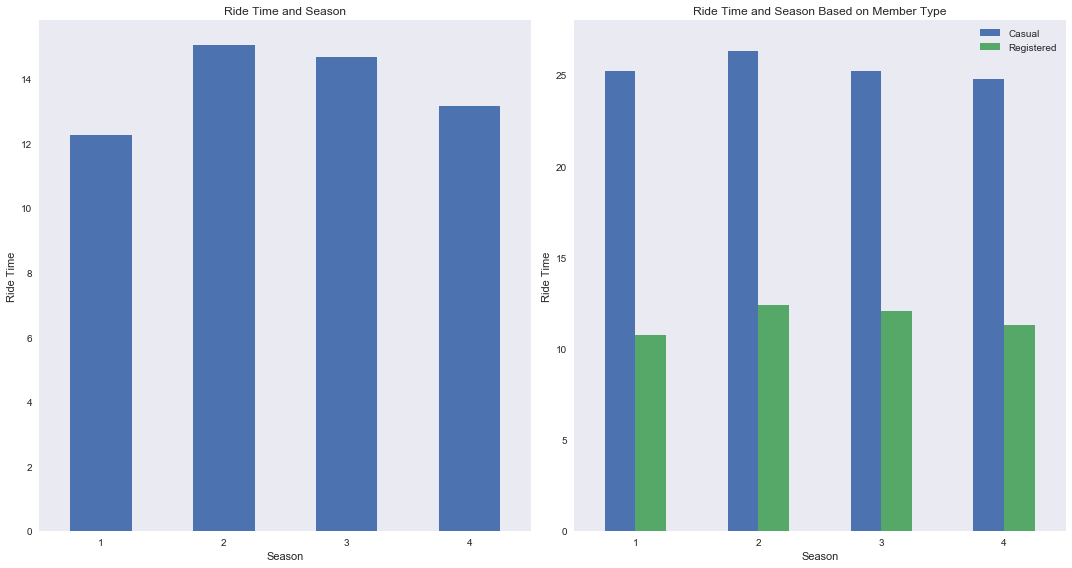

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.set_figheight(8)
fig.set_figwidth(15)

season_grouping.plot.bar(ax=axes[0], rot=0)
axes[0].grid(False)
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Ride Time')
axes[0].set_title('Ride Time and Season')

bikeshare_season_type_piv.plot.bar(ax=axes[1], rot=0)
axes[1].grid(False)
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Ride Time')
axes[1].set_title('Ride Time and Season Based on Member Type')
axes[1].set_ylim([0,28])
axes[1].legend(('Casual', 'Registered'))

plt.tight_layout()
plt.show()

The next step is to look at how the ride duration compares to the quantitative variables humidity, temperature, and wind speed. Below are the two graphs which show the scatter plot and regression plot for ride time vs. temperature. The scatter plot is hard to read due to the amount of points, so the regression plot was included. As the temperature increases, the ride time also increase, which is expected. Warmer temperatures should lead to longer rides. 

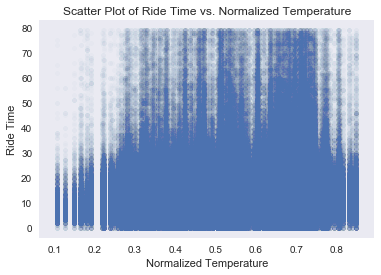

In [127]:
bikeshare.plot.scatter(x='temp', y='time_diff', alpha=0.02)
plt.grid(False)
plt.xlabel('Normalized Temperature')
plt.ylabel('Ride Time')
plt.title('Scatter Plot of Ride Time vs. Normalized Temperature')
plt.show()

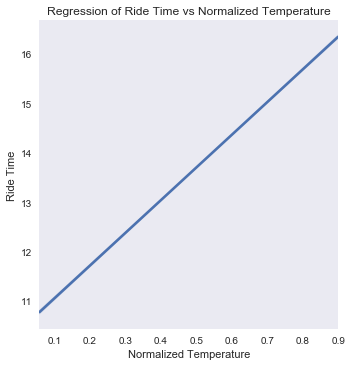

In [129]:
sb.lmplot(x='temp', y='time_diff', data=bikeshare, scatter=False)
plt.grid(False)
plt.xlabel('Normalized Temperature')
plt.ylabel('Ride Time')
plt.title('Regression of Ride Time vs Normalized Temperature')
plt.show()

In addition to the overall dataset, the regression line is provided below for casual and registered riders. Both show the same results as the overall dataset, but the casual riders does not have the same increase. The rides for casual riders on increases a small amount when the temperature increases.

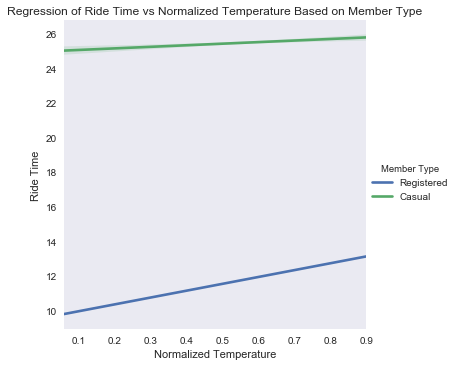

In [107]:
plt.figure(figsize=(10, 5))
sb.lmplot(x='temp', y='time_diff', hue='Member Type', data=bikeshare, scatter=False)
plt.grid(False)
plt.xlabel('Normalized Temperature')
plt.ylabel('Ride Time')
plt.title('Regression of Ride Time vs Normalized Temperature Based on Member Type')
plt.show()

Windspeed was the next categorical variable to analyze. As with temperature, a scatter plot and a regression line were included. The scatter plot, although hard to read, seems to show that when the windspeed increases the ride time decreases. This is confirmed when looking that the regression line.

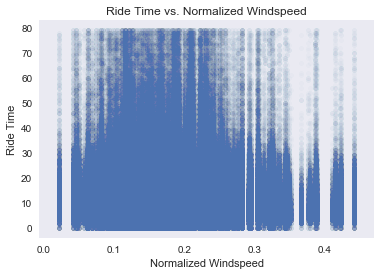

In [133]:
bikeshare.plot.scatter(x='windspeed', y='time_diff', alpha=0.02)
plt.grid(False)
plt.xlabel('Normalized Windspeed')
plt.ylabel('Ride Time')
plt.title('Ride Time vs. Normalized Windspeed')
plt.show()

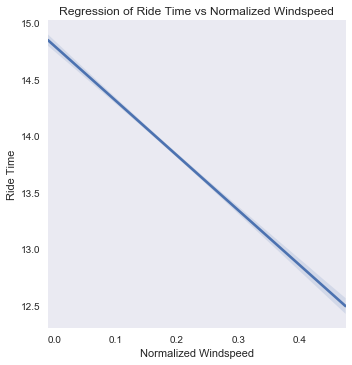

In [134]:
sb.lmplot(x='windspeed', y='time_diff', data=bikeshare, scatter=False)
plt.grid(False)
plt.xlabel('Normalized Windspeed')
plt.ylabel('Ride Time')
plt.title('Regression of Ride Time vs Normalized Windspeed')
plt.show()

When the windspeed and ride times are broken down by casual and registed riders, the conclusions are the same in that the increase in windspeed causes a decrease in ride time.

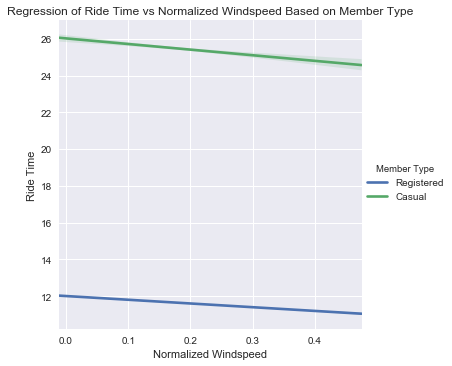

In [137]:
plt.figure(figsize=(10, 5))
sb.lmplot(x='windspeed', y='time_diff', hue='Member Type', data=bikeshare, scatter=False)
plt.xlabel('Normalized Windspeed')
plt.ylabel('Ride Time')
plt.title('Regression of Ride Time vs Normalized Windspeed Based on Member Type')
plt.show()

The final quantitative variable to analyze was the humidity variable and the ride times. Based on the scatter plot and the regression line for humidity, there seems to be an increase in ride time when the humidity increases. This did not seem correct as one would expect there to be a decrease. Increased humidity will increase the temperature feel so it was expected that there would be a decrease in ride time.

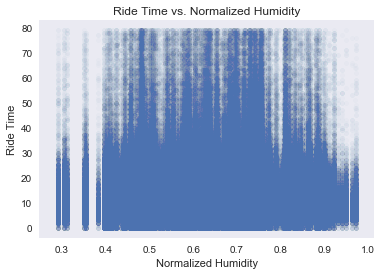

In [138]:
bikeshare.plot.scatter(x='hum', y='time_diff', alpha=0.02)
plt.grid(False)
plt.xlabel('Normalized Humidity')
plt.ylabel('Ride Time')
plt.title('Ride Time vs. Normalized Humidity')
plt.show()

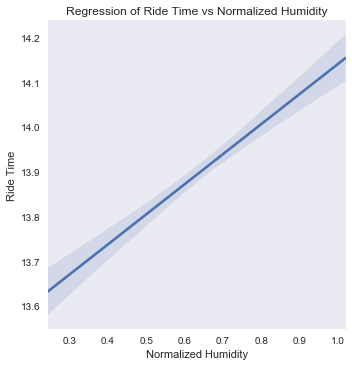

In [141]:
sb.lmplot(x='hum', y='time_diff', data=bikeshare, scatter=False)
plt.grid(False)
plt.xlabel('Normalized Humidity')
plt.ylabel('Ride Time')
plt.title('Regression of Ride Time vs Normalized Humidity')
plt.show()

When ride time vs. humidity is broken down by member type, there does seem to be a decrease in the ride time, but only for casual riders. Registered riders do not seem to be affected by the humidity changes.

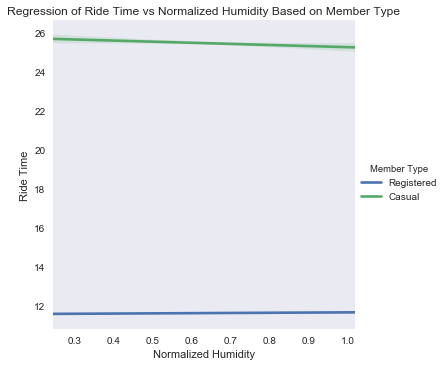

In [143]:
plt.figure(figsize=(10, 5))
sb.lmplot(x='hum', y='time_diff', hue='Member Type', data=bikeshare, scatter=False)
plt.grid(False)
plt.xlabel('Normalized Humidity')
plt.ylabel('Ride Time')
plt.title('Regression of Ride Time vs Normalized Humidity Based on Member Type')

plt.show()

The dataset also contained a categorical variable for the weather during the day.

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

According to the graphs below, when the weather deteriorates, the avergage ride times decrease. This decrease also occurs when the data is separated by casual and registered riders. Casual riders have much longer ride times compared to registered riders, which has been consistent throughout the initial analysis.

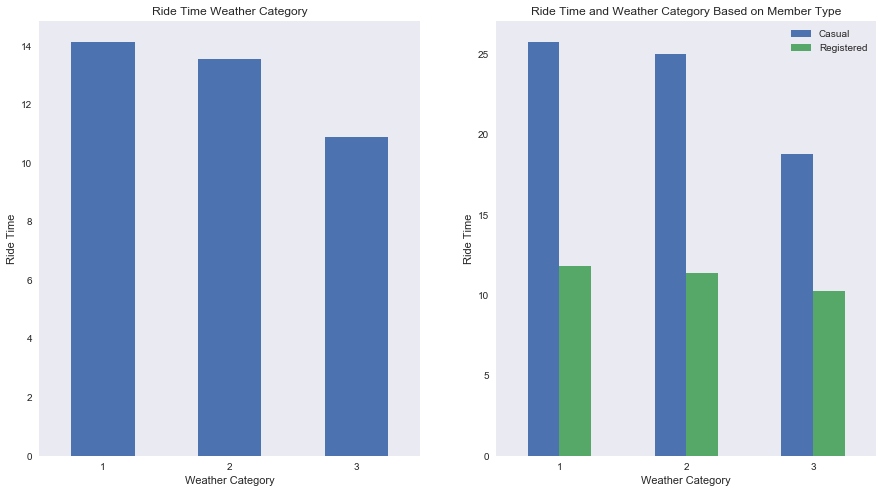

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.set_figheight(8)
fig.set_figwidth(15)

weather_type_grouping.plot.bar(ax=axes[0], rot=0)
axes[0].grid(False)
axes[0].set_xlabel('Weather Category')
axes[0].set_ylabel('Ride Time')
axes[0].set_title('Ride Time Weather Category')

bikeshare_weather_type_piv.plot.bar(ax=axes[1], rot=0)
axes[1].grid(False)
axes[1].set_xlabel('Weather Category')
axes[1].set_ylabel('Ride Time')
axes[1].set_title('Ride Time and Weather Category Based on Member Type')
axes[1].legend(('Casual', 'Registered'))

plt.show()

## Ride Times and Calendar
In addition to weather variables, the data also contains categorical variables regarding the day of the week, whether the day was a holiday, and whether it was a workday. 
<br>
<br>
When looking at the holiday and the average ride times, there is a difference between when there is a holiday (1) and when there is not (0). The ride times increase and the comparison of member type show the same results. 

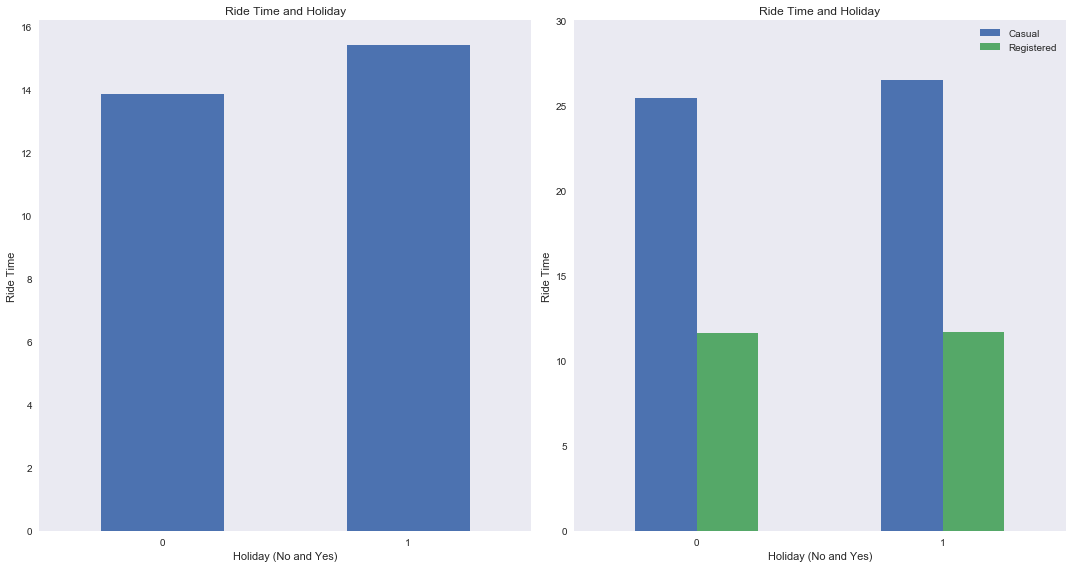

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.set_figheight(8)
fig.set_figwidth(15)

holiday_grouping.plot.bar(ax=axes[0], rot=0)
axes[0].set_xlabel('Holiday (No and Yes)')
axes[0].set_ylabel('Ride Time')
axes[0].set_title('Ride Time and Holiday')
axes[0].grid(False)

bikeshare_holiday_type_piv.plot.bar(ax=axes[1], rot=0)
axes[1].set_xlabel('Holiday (No and Yes)')
axes[1].set_ylabel('Ride Time')
axes[1].set_title('Ride Time and Holiday')
axes[1].grid(False)
axes[1].set_ylim([0,30])
axes[1].legend(('Casual', 'Registered'))
plt.tight_layout()
plt.show()

When determining the average ride times for the different days of the week for the overall dataset and the dataset broken down by member type, it shows the weekend rides are generally longer than weekday rides. However, the difference with registered riders is very minimal. The graph on the right also shows that the ride times for casual riders is much hgher than registered riders, which is consistent throughout.

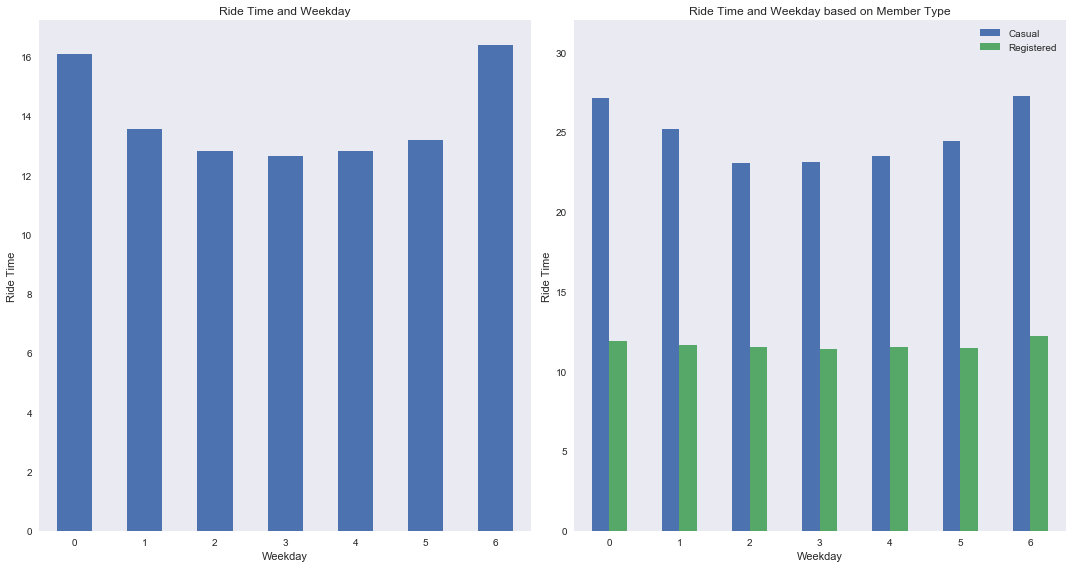

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.set_figheight(8)
fig.set_figwidth(15)

weekday_grouping.plot.bar(ax=axes[0], rot=0)
axes[0].grid(False)
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Ride Time')
axes[0].set_title('Ride Time and Weekday')

bikeshare_weekday_type_piv.plot.bar(ax=axes[1], rot=0)
axes[1].grid(False)
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Ride Time')
axes[1].set_title('Ride Time and Weekday based on Member Type')
axes[1].set_ylim([0,32])
axes[1].legend(('Casual', 'Registered'))

plt.tight_layout()
plt.show()

The graphs of the average ride times and whether the day was a workday show that non-workday rides are longer than rides on workdays. The graph on the right, which breaks down the member type, shows that there is a larger difference in ride time for casual riders compared to registered riders.

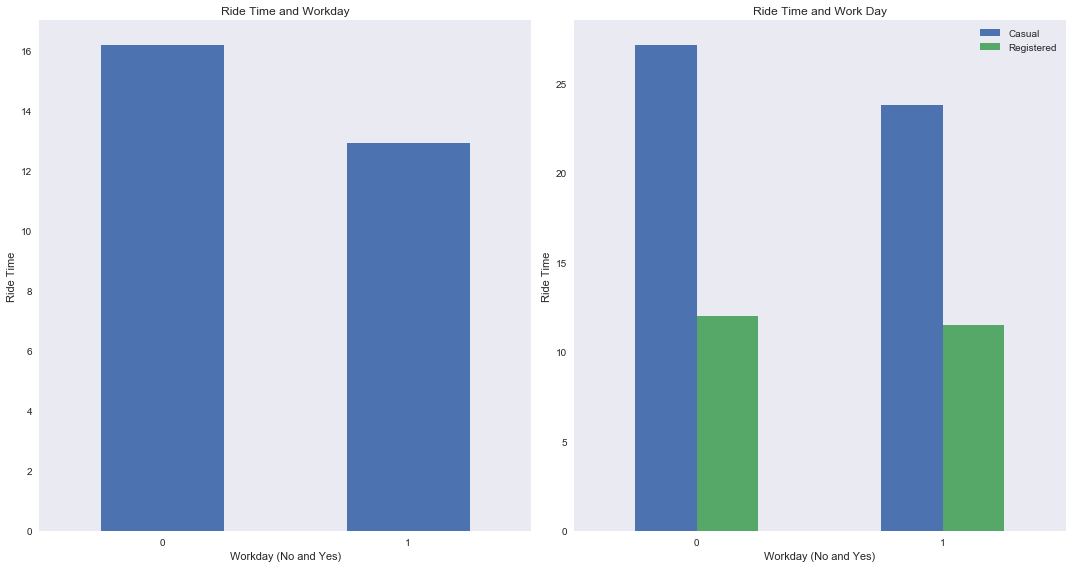

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.set_figheight(8)
fig.set_figwidth(15)

workday_grouping.plot.bar(ax=axes[0], rot=0)
axes[0].grid(False)
axes[0].set_xlabel('Workday (No and Yes)')
axes[0].set_ylabel('Ride Time')
axes[0].set_title('Ride Time and Workday')

bikeshare_work_type_piv.plot.bar(ax=axes[1], rot=0)
axes[1].grid(False)
axes[1].set_xlabel('Workday (No and Yes)')
axes[1].set_ylabel('Ride Time')
axes[1].set_title('Ride Time and Work Day')
axes[1].legend(('Casual', 'Registered'))

plt.tight_layout()
plt.show()

## Initial Conclusions
The biggest conclusion that can be drawn from the initial analysis is that casual riders are on the bikeshare bikes longer than registered riders. This is consistent throughout each of the different variables covered. This is to be expected as many casual riders are tourists and they seem to stop more to look at the different sites within Washington D.C.. 
<br>
<br>
Further investigation is needed (statistical analysis) to determine the effect of weather variables and the ride times. Just based on this analysis, warmer temperatures lead to longer rides while higher humidities and windspeeds cause a decrease in ride durationl. 
<br>
<br>
In addition to the member type and weather, calendar events can also cause an increase or decrease in ride duration. Weekends, non-workdays, and holidays all increase the ride times for the overall data and for both member types.

## Hypothesis to Investigate Further
Although the analysis above provides a good base for the understanding the dataset at hand, there are additional things to look at. The list below contains the additional analysis that should be completed to get an even better understanding of what variables change ride duration.

1. Analyze whether ride duration is affected based on multiple variables (like season and workday, season and holiday, etc.)
2. Determine the most common starting points, end points, and combinations of start/end points.
3. Determine if the number of bikes leaving and coming into a station is equal
    * This will show whether a station needs to have bikes transported to the station or not
4. Determine the most common areas (memorials, restaurants, neighborhoods)
5. Are the differences in means of ride times with categorical variables statistically significant?
6. Are the regression lines for the ride times and the quantitative weather variables statistically significant?